In [1]:
import proplot as plot
import numpy as np
import yaml

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging
import sys

import pizza_cutter

logging.basicConfig(stream=sys.stdout)
for code in ["ngmix", "metadetect", "pizza_cutter", "pizza_cutter_sims"]:
    logging.getLogger(code).setLevel(
        getattr(logging, "DEBUG_PLOT"))

In [3]:
from pizza_cutter_sims.sim import generate_sim
from pizza_cutter_sims.constants import PIXEL_SCALE

rng = np.random.RandomState(seed=10)
gal_rng = np.random.RandomState(seed=42)

with open("../runs/run0008_wcs-d_gals-bg_msk-None_coadd-2/config.yaml") as fp:
    cfg = yaml.safe_load(fp.read())

data = generate_sim(
    rng=rng,
    gal_rng=gal_rng,
    coadd_config=cfg["coadd"],
    se_config=cfg["se"],
    psf_config=cfg["psf"],
    gal_config=cfg["gal"],
    layout_config=cfg["layout"],
    msk_config=cfg["msk"],
    shear_config=cfg["shear"],
)

DEBUG:pizza_cutter_sims.wcs:generated wcs: galsim.AffineTransform(0.263, 0.0, 0.0, 0.263, origin=galsim.PositionD(x=206.78159213659688, y=205.00733250968761), world_origin=galsim.PositionD(x=0.0, y=0.0))
DEBUG:pizza_cutter_sims.wcs:generated wcs: galsim.AffineTransform(0.263, 0.0, 0.0, 0.263, origin=galsim.PositionD(x=204.51184479898373, y=206.03657679015734), world_origin=galsim.PositionD(x=0.0, y=0.0))
DEBUG:pizza_cutter_sims.psf:psf config: {'type': 'Gaussian', 'fwhm': 0.7227947463586589, 'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}}
DEBUG:pizza_cutter_sims.psf:galsim psf: galsim.Gaussian(sigma=0.30694266760802913)
DEBUG:pizza_cutter_sims.psf:psf config: {'type': 'Gaussian', 'fwhm': 0.8356110090264279, 'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}}
DEBUG:pizza_cutter_sims.psf:galsim psf: galsim.Gaussian(sigma=0.35485132326340696)
DEBUG:pizza_cutter_sims.gals:using 'grid' layout
DEBUG:pizza_cutter_sims.gals:using 'exp-bright' gal type w/ mag 18


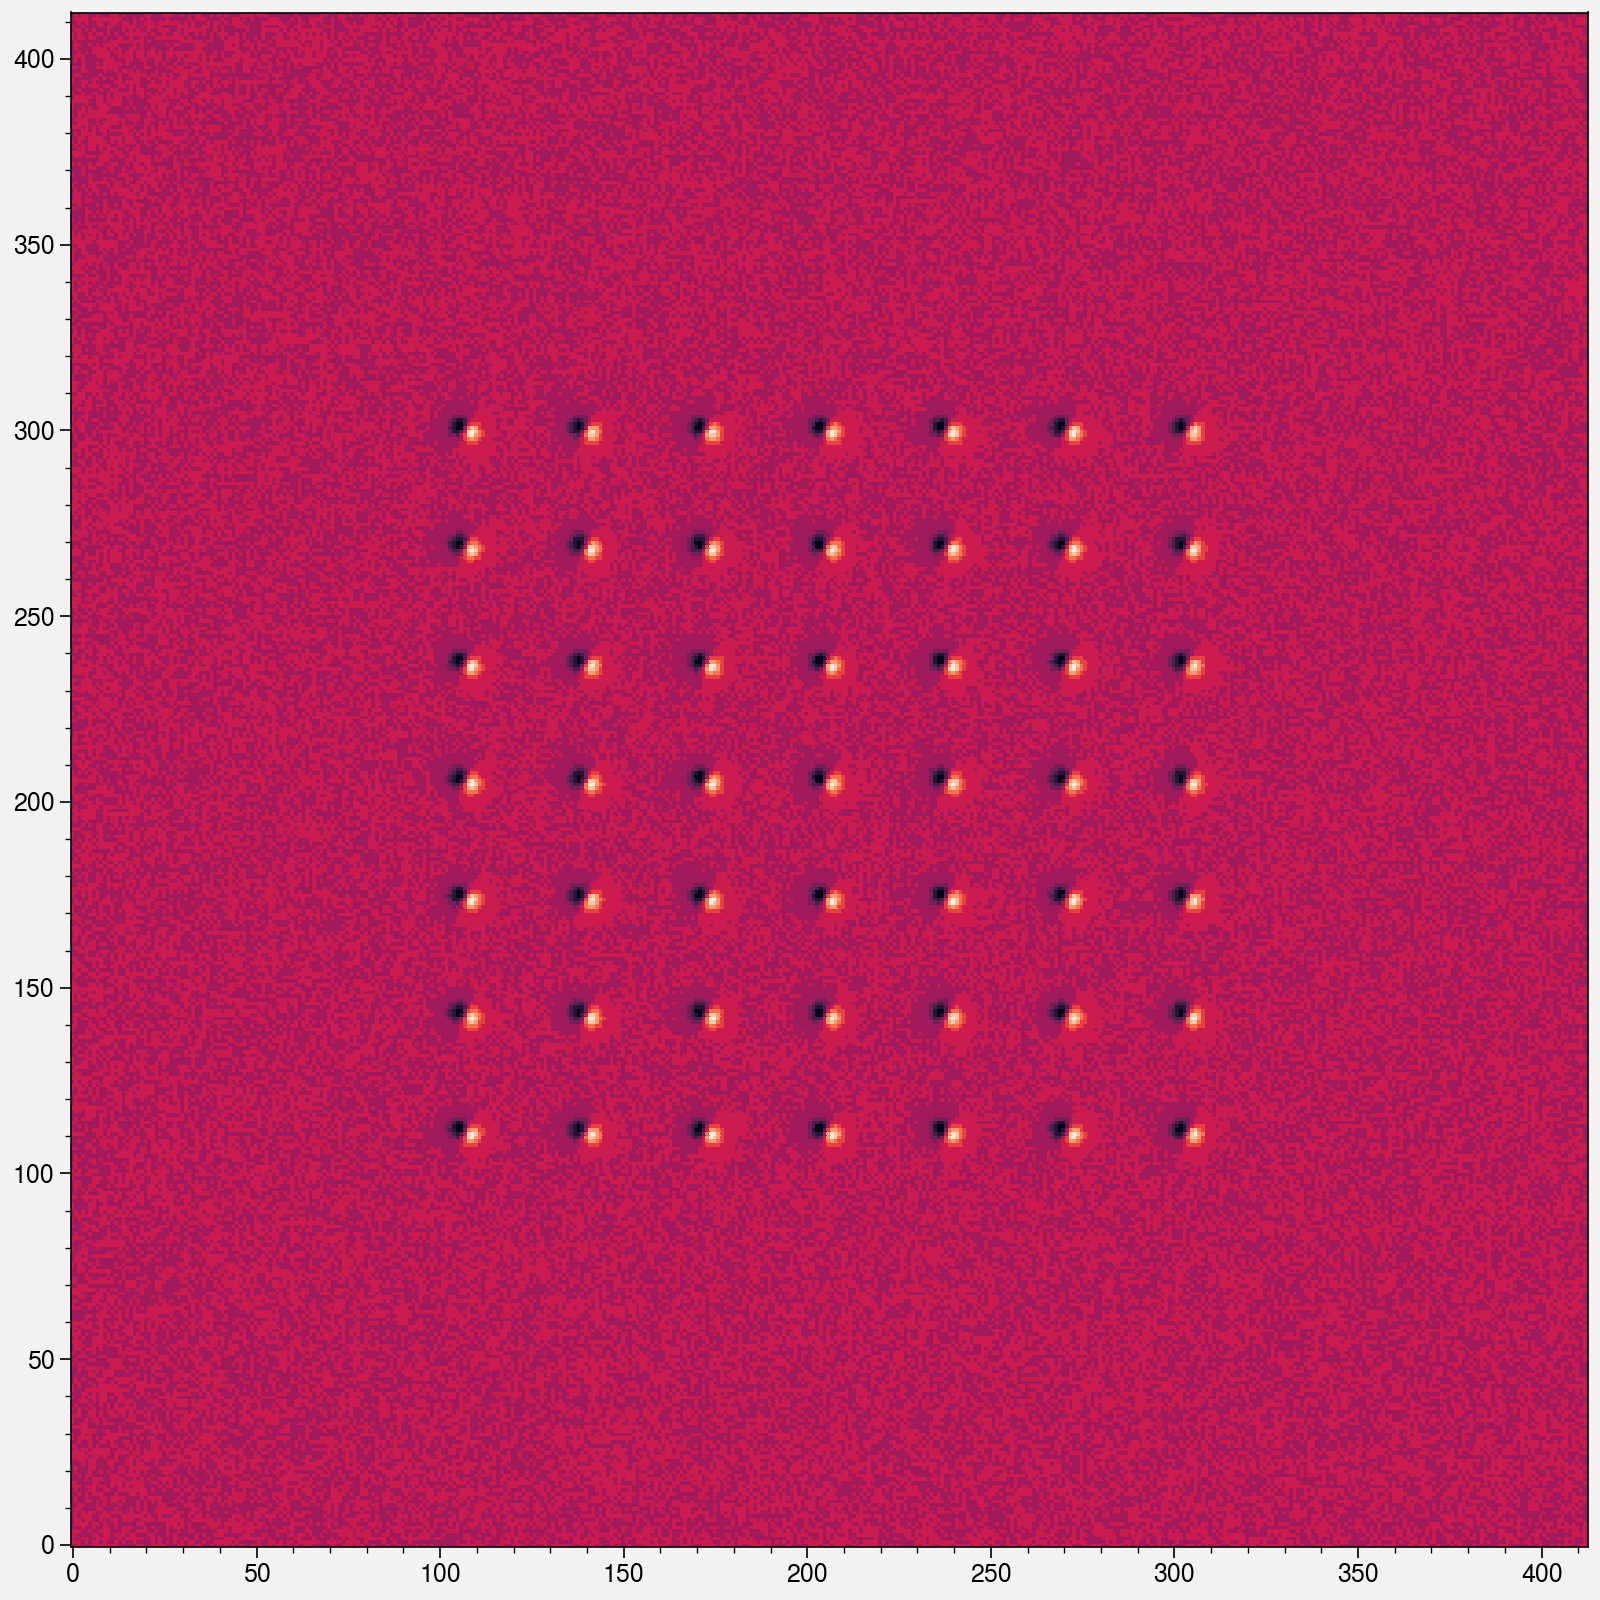

In [4]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(8, 8), share=0)
axs.pcolormesh(data["img"][0] - data["img"][1], cmap="rocket")

In [5]:
data["info"]

{'src_info': [{'magzp': 30.0,
   'scale': 1.0,
   'position_offset': 0,
   'affine_wcs_config': {'dudx': 0.263,
    'dudy': 0.0,
    'dvdx': 0.0,
    'dvdy': 0.263,
    'x0': 206.78159213659688,
    'y0': 205.00733250968761},
   'image_shape': [413, 413],
   'image_flags': 0,
   'galsim_psf_config': {'type': 'Gaussian',
    'fwhm': 0.7227947463586589,
    'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}},
   'image_path': array([[-11.36611777,   1.3512676 ,  14.84526358, ..., -10.05876145,
             3.27564567,   5.79038167],
          [ -4.59936475,  -4.3582742 ,   5.36256498, ...,   6.23375689,
            11.98589615,  -3.08792491],
          [  9.70155829,   4.51033459, -10.62720039, ...,  -4.24934731,
            -1.76455408,  10.06769863],
          ...,
          [-11.20394165,  -3.62020299,  11.36415865, ...,  14.76331284,
             2.25270739,  14.90142985],
          [-15.32081462,   2.10440208,  -7.63532503, ...,  11.58289712,
            11.28012959,   6.21456611],
   

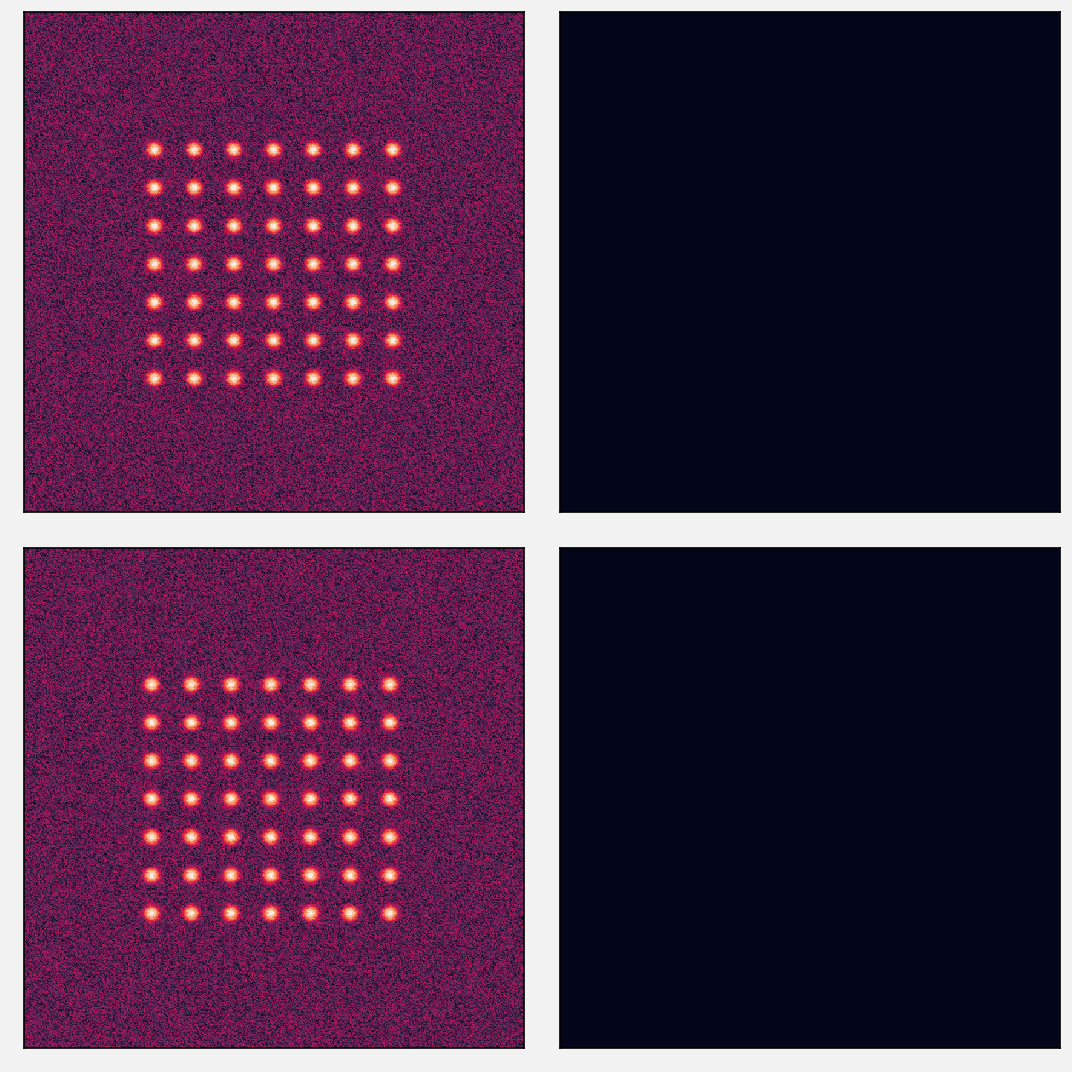

In [6]:
fig, axs = plot.subplots(nrows=len(data["img"]), ncols=2)

for i in range(len(data["img"])):
    
    axs[i, 0].pcolormesh(np.arcsinh(data["img"][i]*np.sqrt(data["wgt"][i])), cmap="rocket")
    axs[i, 0].set_aspect(1)
    axs[i, 0].xaxis.set_visible(False)
    axs[i, 0].yaxis.set_visible(False)
    axs[i, 1].pcolormesh(data["msk"][i], cmap="rocket")
    axs[i, 1].set_aspect(1)
    axs[i, 1].xaxis.set_visible(False)
    axs[i, 1].yaxis.set_visible(False)


INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for coadd/coadd
INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for epoch0/epoch0
INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for epoch1/epoch1
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:generating slice objects for ra,dec = 0.0|0.0
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:found possible image epoch0/epoch0


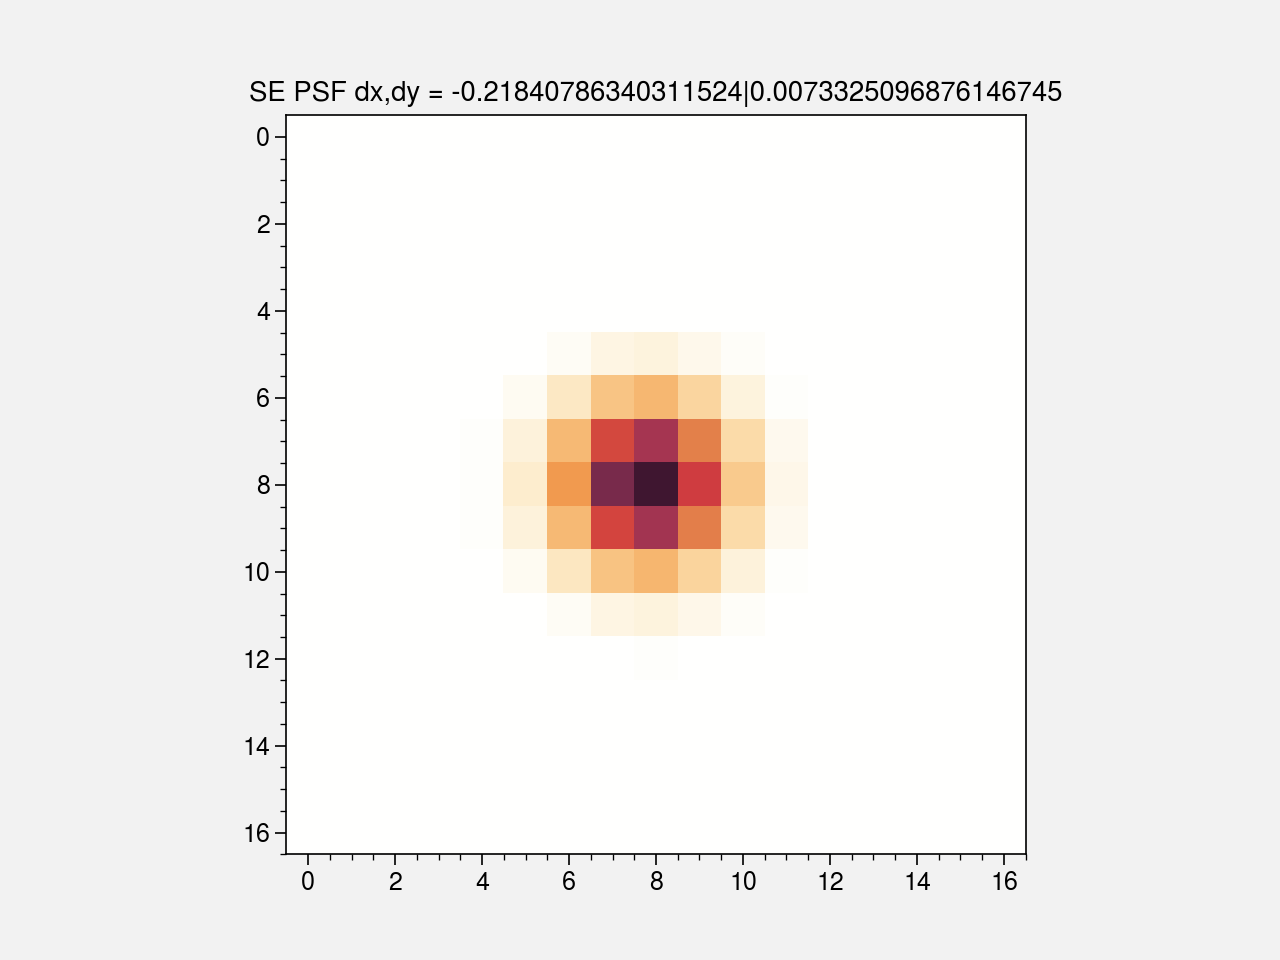

DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:found possible image epoch1/epoch1


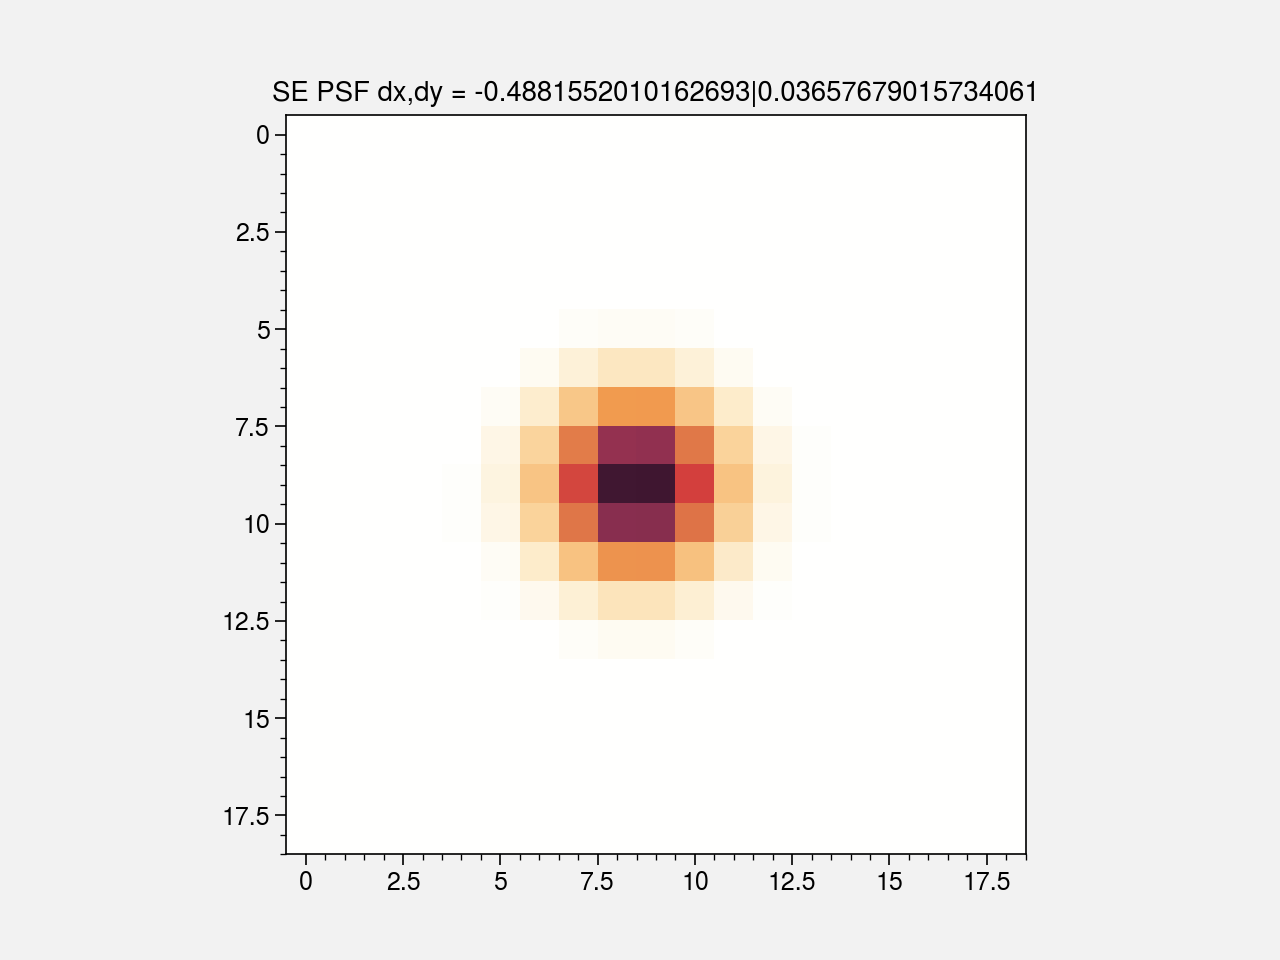

INFO:pizza_cutter.des_pizza_cutter._coadd_slices:images found in rough cut: 2
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:pre-proccseeing image epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:symmetrizing the masks
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:pre-proccseeing image epoch1/epoch1
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:symmetrizing the masks
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:coadding weights: [0.5, 0.5]
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:resampling image epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs inverse cache miss for epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs interp cache info: CacheInfo(hits=0, misses=1, maxsize=32, currsize=1)
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs interp took 0.097344 seconds
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs area interp cache miss for epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._se_image:SE wcs area cache info:

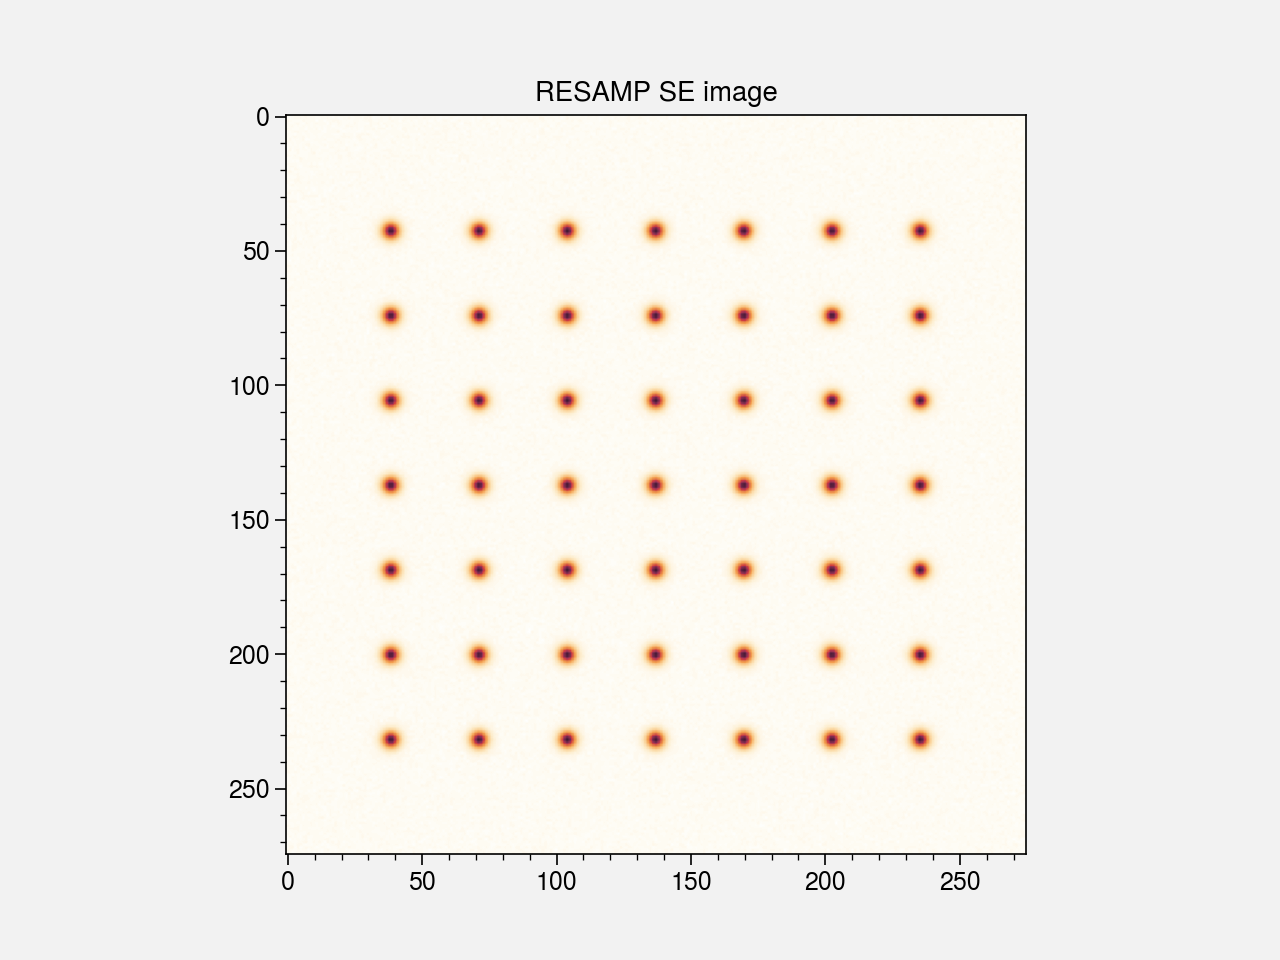

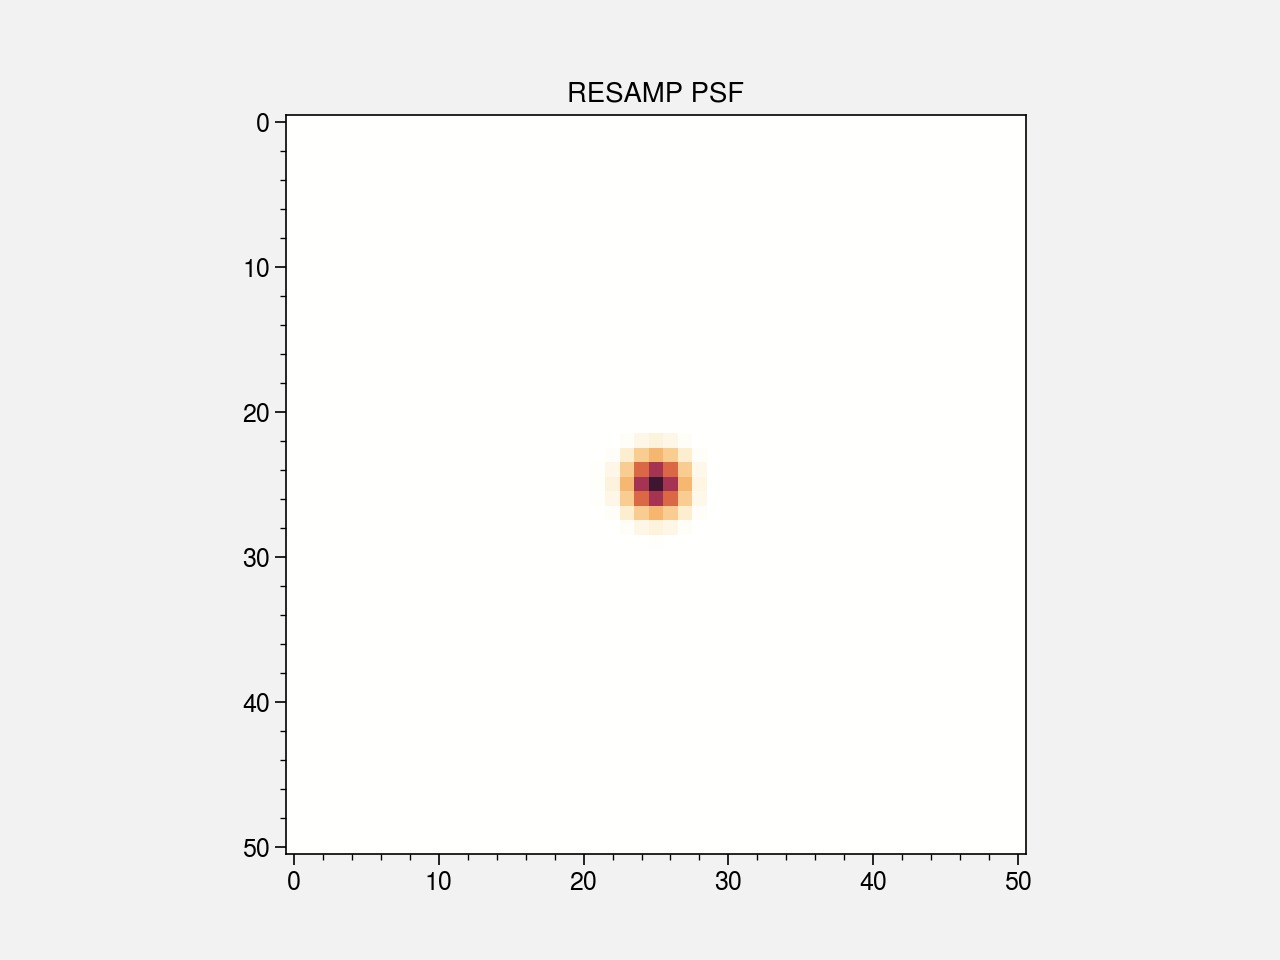

INFO:pizza_cutter.des_pizza_cutter._coadd_slices:resampling image epoch1/epoch1
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs inverse cache miss for epoch1/epoch1
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs interp cache info: CacheInfo(hits=0, misses=2, maxsize=32, currsize=2)
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs interp took 0.158786 seconds
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs area interp cache miss for epoch1/epoch1
DEBUG:pizza_cutter.des_pizza_cutter._se_image:SE wcs area cache info: CacheInfo(hits=0, misses=3, maxsize=32, currsize=3)
DEBUG:pizza_cutter.des_pizza_cutter._se_image:SE wcs area interp took 0.030313 seconds
DEBUG:pizza_cutter.des_pizza_cutter._se_image:coadd wcs area cache info: CacheInfo(hits=1, misses=3, maxsize=32, currsize=3)
DEBUG:pizza_cutter.des_pizza_cutter._se_image:coadd wcs area interp took 0.001432 seconds


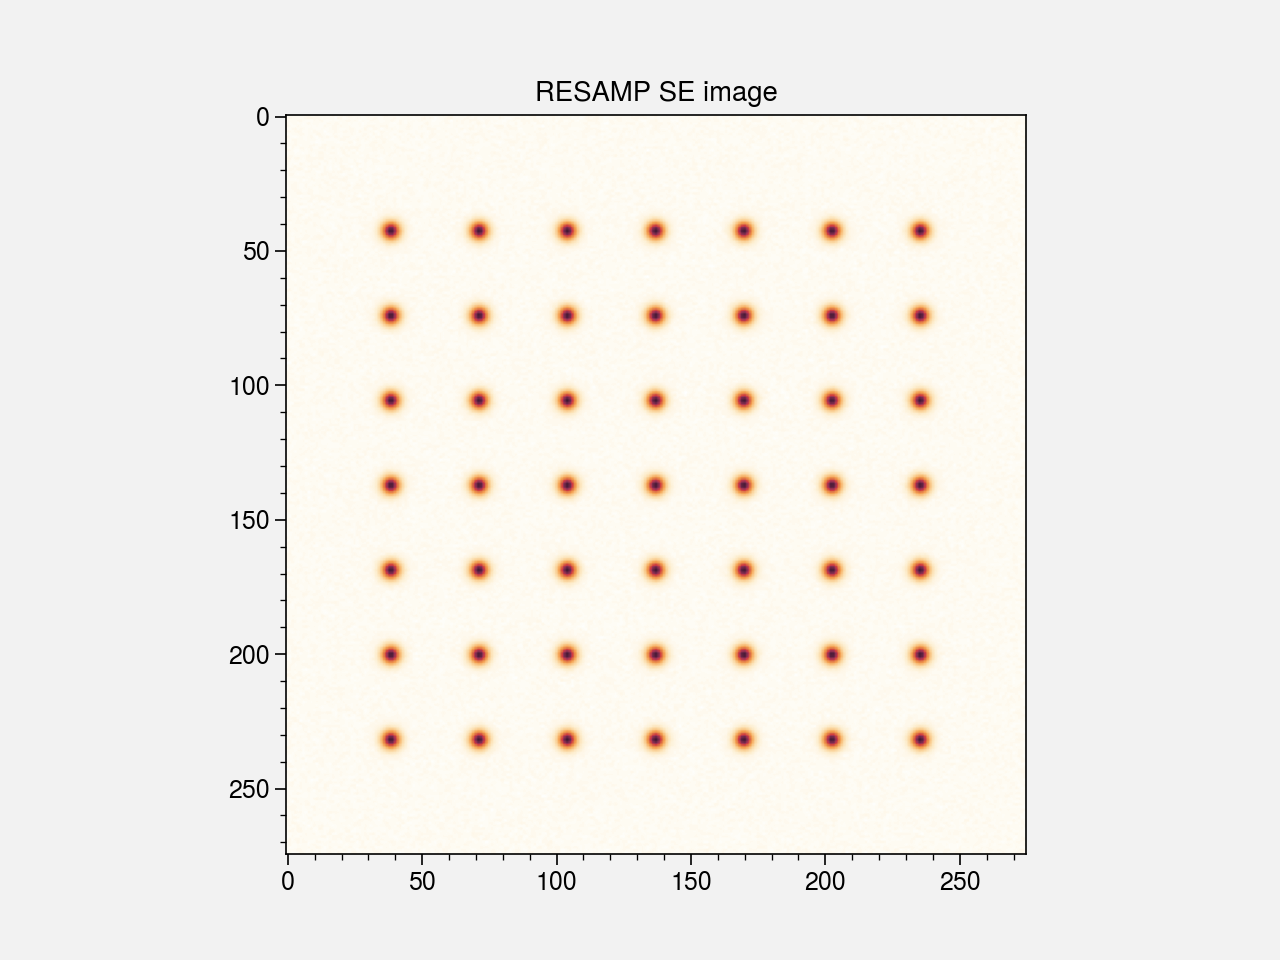

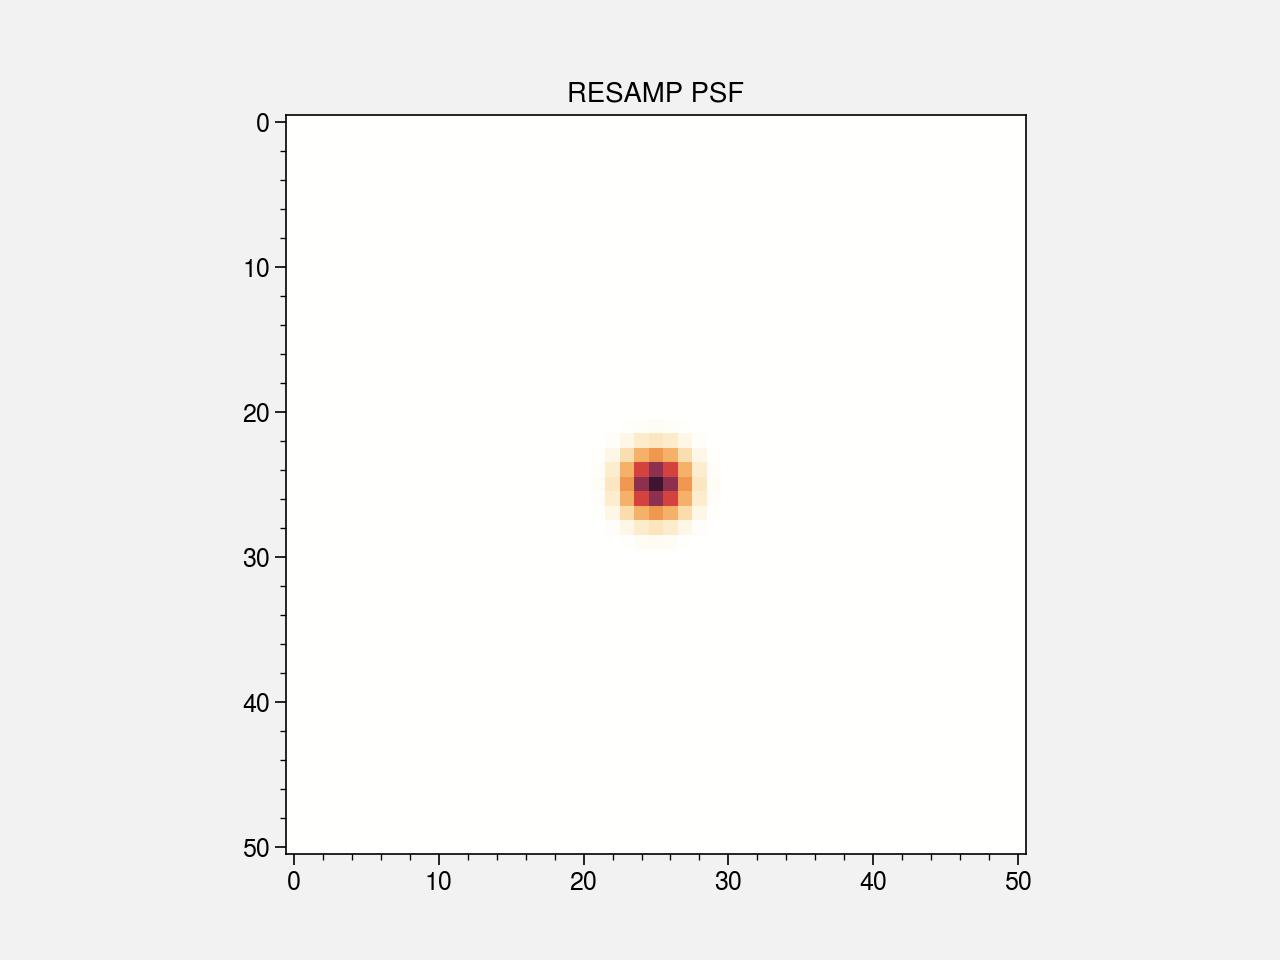

In [7]:
import tempfile
from pizza_cutter_sims.pizza_cutter import run_des_pizza_cutter_coadding_on_sim

coadd_rng = np.random.RandomState(seed=57)
with tempfile.TemporaryDirectory() as tmpdir:
    cdata = run_des_pizza_cutter_coadding_on_sim(
        rng=coadd_rng,
        tmpdir=tmpdir,
        single_epoch_config=cfg["pizza_cutter"]["single_epoch_config"],
        **data,
    )

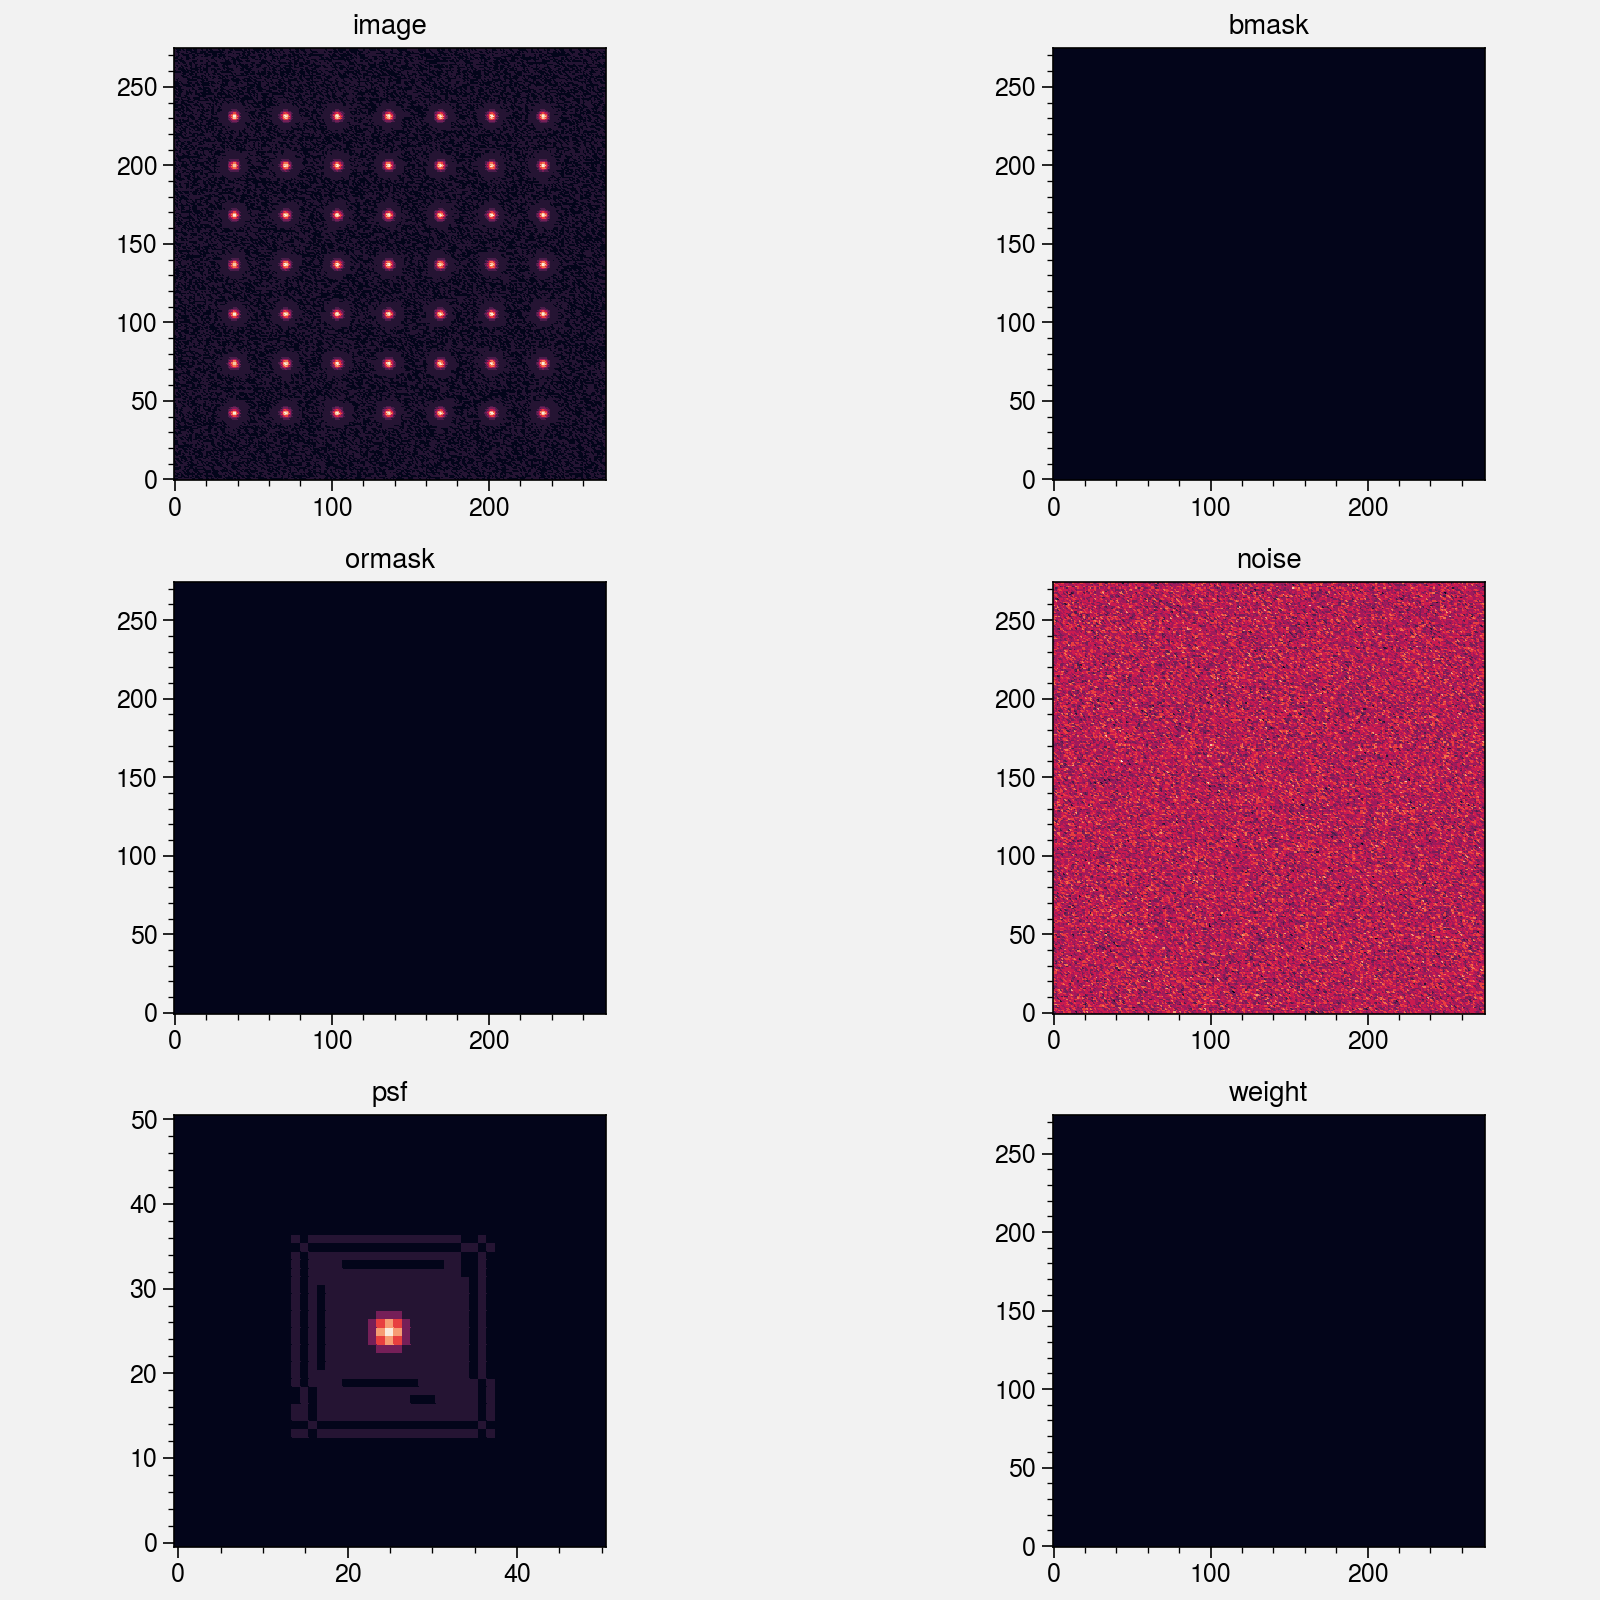

In [8]:
fig, axs = plot.subplots(nrows=3, ncols=2, figsize=(8, 8), share=0)

for i, key in enumerate(["image", "bmask", "ormask", "noise", "psf", "weight"]):
    
    axs[i].pcolormesh(cdata[key], cmap="rocket")
    axs[i].set_aspect(1)
    axs[i].set_title(key)


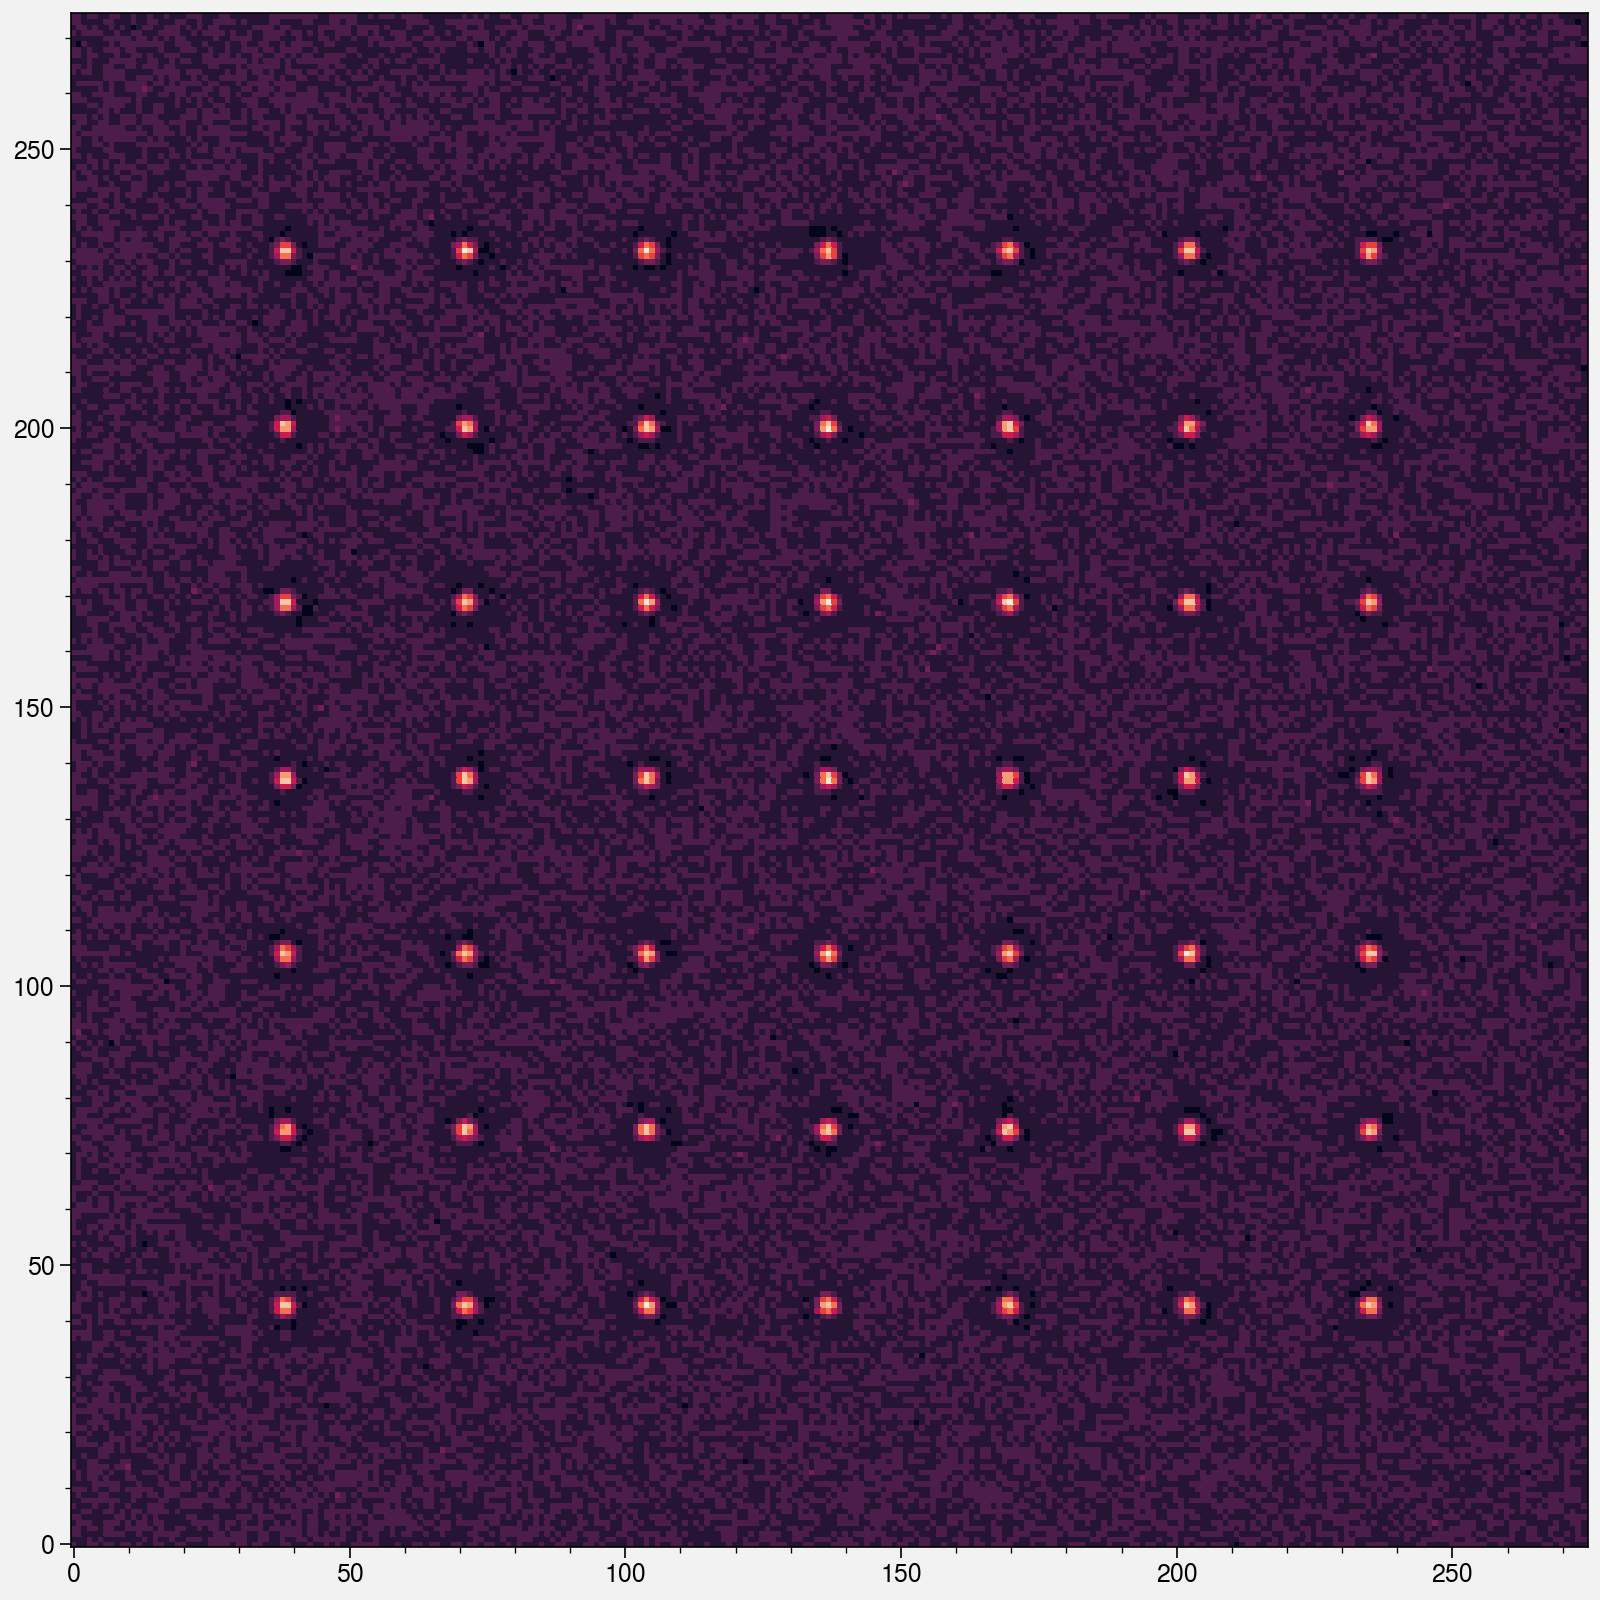

In [10]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(8, 8), share=0)
axs.pcolormesh(cdata["rsd"][0]["image"] - cdata["rsd"][1]["image"], cmap="rocket")